# 🩺 Healthcare Dataset 🧪

### Dados baixado via API Kaggle 

 https://www.kaggle.com/datasets/prasad22/healthcare-dataset

  ## Contexto :

> Este conjunto de dados sintéticos de saúde foi criado para servir como um recurso valioso para entusiastas de ciência de dados, aprendizado de máquina e análise de dados. Ele foi projetado para imitar dados de saúde do mundo real, permitindo que os usuários pratiquem, desenvolvam e demonstrem suas habilidades de manipulação e análise de dados no contexto do setor de saúde.

In [1]:
# Baixando a instncia 
pip install kaggle


SyntaxError: invalid syntax (3923213392.py, line 2)

## 1- Baixando as Bibliotecas 

In [3]:
# importando as Bibliotecas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import pymssql as sql
import warnings
warnings.filterwarnings("ignore")
import pyodbc
import sqlalchemy as sa 


## 2 - Configurando as Credenciais  Kaggle

In [4]:


# Configurar as credenciais
os.environ['KAGGLE_USERNAME'] = "robertosouzas"
os.environ['KAGGLE_KEY'] = "eba652adb9d6fc3525df997992059572"


In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Configurar a API do Kaggle
api = KaggleApi()
api.authenticate()

# Nome do dono do conjunto de dados e nome do conjunto de dados
owner = 'prasad22'
dataset_name = 'healthcare-dataset'

# Baixar o conjunto de dados
api.dataset_download_files(f"{owner}/{dataset_name}", unzip=True)


In [6]:
# Ler o arquivo CSV baixado
df = pd.read_csv('healthcare_dataset.csv')



##  Visualizando os dados

In [7]:
# Exibir as primeiras linhas da tabela
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


## 3 - Análise Exploratória 

In [8]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [9]:
# Verificando o shape

df.shape

(10000, 15)

In [10]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

## Renomeando as colunas 

In [11]:
# Dicionário de mapeamento de colunas
mapeamento_colunas = {
    'Name': 'Nome',
    'Age': 'Idade',
    'Gender': 'Genero',
    'Blood Type': 'Tipo_Sanguineo',
    'Medical Condition': 'Condicao_Medica',
    'Date of Admission': 'Data_Admissao',
    'Doctor': 'Medico',
    'Hospital': 'Hospital',
    'Insurance Provider': 'Provedora_de_Seguros',
    'Billing Amount': 'Valor_de_Cobranca',
    'Room Number': 'Numero_do_Quarto',
    'Admission Type': 'Tipo_de_Admissao',
    'Discharge Date': 'Data_de_Alta',
    'Medication': 'Medicacao',
    'Test Results': 'Resultados_do_Teste'
    # Adicione mais mapeamentos conforme necessário
}

# Renomear colunas usando o mapeamento
df = df.rename(columns=mapeamento_colunas)

# Exibir DataFrame com colunas traduzidas
df.head()

,Nome,Idade,Genero,Tipo_Sanguineo,Condicao_Medica,Data_Admissao,Medico,Hospital,Provedora_de_Seguros,Valor_de_Cobranca,Numero_do_Quarto,Tipo_de_Admissao,Data_de_Alta,Medicacao,Resultados_do_Teste
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


## Conversão de Tipos de Dados

####  Convertendo as colunas (Date of Admission, Discharge Date) para o tipo de dados de data

In [12]:
# Convertendo as colunas para o tipo de dados de data
df['Data_Admissao'] = pd.to_datetime(df['Data_Admissao'])
df['Data_de_Alta'] = pd.to_datetime(df['Data_de_Alta'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Nome                  10000 non-null  object        
 1   Idade                 10000 non-null  int64         
 2   Genero                10000 non-null  object        
 3   Tipo_Sanguineo        10000 non-null  object        
 4   Condicao_Medica       10000 non-null  object        
 5   Data_Admissao         10000 non-null  datetime64[ns]
 6   Medico                10000 non-null  object        
 7   Hospital              10000 non-null  object        
 8   Provedora_de_Seguros  10000 non-null  object        
 9   Valor_de_Cobranca     10000 non-null  float64       
 10  Numero_do_Quarto      10000 non-null  int64         
 11  Tipo_de_Admissao      10000 non-null  object        
 12  Data_de_Alta          10000 non-null  datetime64[ns]
 13  Medicacao        

In [14]:
# Estatística Descritiva
df.describe()

,Idade,Valor_de_Cobranca,Numero_do_Quarto
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


## 4 - verificando Valores ausentes 

In [15]:
# Verificar valores ausentes em cada coluna
valores_ausentes = df.isnull().sum()

# Exibir a contagem de valores ausentes
print(valores_ausentes)

Nome                    0
Idade                   0
Genero                  0
Tipo_Sanguineo          0
Condicao_Medica         0
Data_Admissao           0
Medico                  0
Hospital                0
Provedora_de_Seguros    0
Valor_de_Cobranca       0
Numero_do_Quarto        0
Tipo_de_Admissao        0
Data_de_Alta            0
Medicacao               0
Resultados_do_Teste     0
dtype: int64


In [16]:
# Calcular a porcentagem de valores ausentes em cada coluna
porcentagem_ausentes = (df.isnull().sum() / len(df)) * 100

# Exibir a porcentagem de valores ausentes
print(porcentagem_ausentes)

Nome                    0.0
Idade                   0.0
Genero                  0.0
Tipo_Sanguineo          0.0
Condicao_Medica         0.0
Data_Admissao           0.0
Medico                  0.0
Hospital                0.0
Provedora_de_Seguros    0.0
Valor_de_Cobranca       0.0
Numero_do_Quarto        0.0
Tipo_de_Admissao        0.0
Data_de_Alta            0.0
Medicacao               0.0
Resultados_do_Teste     0.0
dtype: float64


## 4 - Verificando  Outliers

In [17]:
from scipy import stats

# Calculando o z-score para todas as colunas numéricas
z_scores = stats.zscore(df.select_dtypes(include='number'))

# Definindo um threshold para identificar outliers (por exemplo, 3 desvios padrão)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Exibindo a contagem de outliers por coluna
outliers_count = pd.DataFrame(outliers, columns=df.columns).sum()
print(outliers_count)


Nome                    0.0
Idade                   0.0
Genero                  0.0
Tipo_Sanguineo          0.0
Condicao_Medica         0.0
Data_Admissao           0.0
Medico                  0.0
Hospital                0.0
Provedora_de_Seguros    0.0
Valor_de_Cobranca       0.0
Numero_do_Quarto        0.0
Tipo_de_Admissao        0.0
Data_de_Alta            0.0
Medicacao               0.0
Resultados_do_Teste     0.0
dtype: float64


In [18]:
# Listar colunas
lista_colunas =df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(lista_colunas)

['Idade', 'Valor_de_Cobranca', 'Numero_do_Quarto']


In [19]:
# Visão geral dos outliers

# Função para calcular o resumo estatístico de outliers
def resumo_outliers(coluna):
    minimo = coluna.min()
    q1 = coluna.quantile(0.25)
    mediana = coluna.median()
    q3 = coluna.quantile(0.75)
    maximo = coluna.max()

    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    outliers = (coluna < limite_inferior) | (coluna > limite_superior)
    numero_outliers = outliers.sum()
    porcentagem_outliers = (numero_outliers / len(coluna)) * 100

    return pd.Series({
        'Mínimo': minimo,
        'Q1': q1,
        'Mediana': mediana,
        'Q3': q3,
        'Máximo': maximo,
        'IQR': iqr,
        'Limite Inferior': limite_inferior,
        'Limite Superior': limite_superior,
        'Número de Outliers': numero_outliers,
        'Porcentagem de Outliers': porcentagem_outliers
    })

# Aplicando a função a todas as colunas numéricas e agregando os resultados
resumo_total = df.select_dtypes(include=['float64', 'int64']).apply(resumo_outliers)

# Exibindo o resumo em forma de tabela
print(resumo_total)


                         Idade  Valor_de_Cobranca  Numero_do_Quarto
Mínimo                    18.0        1000.180837             101.0
Q1                        35.0       13506.523967             199.0
Mediana                   52.0       25258.112566             299.0
Q3                        68.0       37733.913727             400.0
Máximo                    85.0       49995.902283             500.0
IQR                       33.0       24227.389760             201.0
Limite Inferior          -14.5      -22834.560672            -102.5
Limite Superior          117.5       74074.998367             701.5
Número de Outliers         0.0           0.000000               0.0
Porcentagem de Outliers    0.0           0.000000               0.0


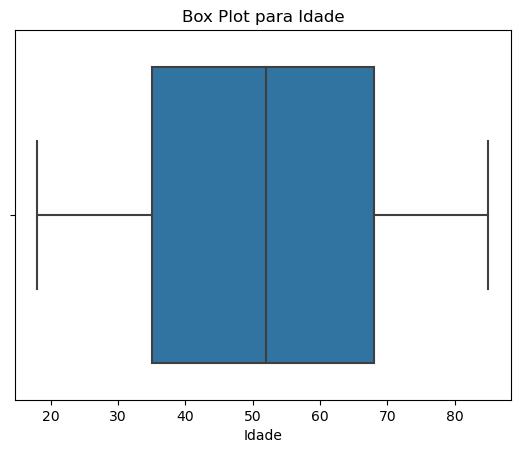

In [20]:
# Exibindo box plot para coluna específica (Age)
sns.boxplot(x=df['Idade'])
plt.title('Box Plot para Idade')
plt.show()

## Valor de Cobrança

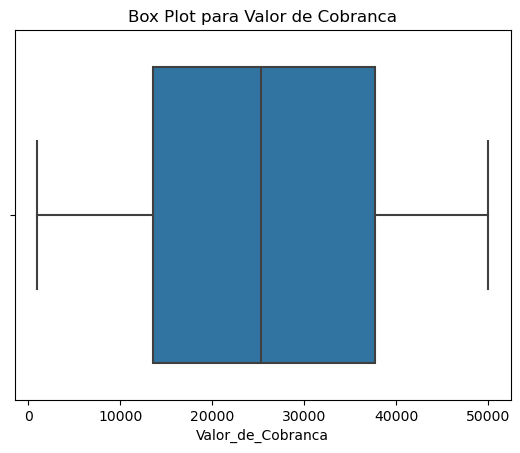

In [21]:
# Exibindo box plot para coluna específica (Billing Amount)
sns.boxplot(x=df['Valor_de_Cobranca'])
plt.title('Box Plot para Valor de Cobranca')
plt.show()

In [22]:
df.head()

,Nome,Idade,Genero,Tipo_Sanguineo,Condicao_Medica,Data_Admissao,Medico,Hospital,Provedora_de_Seguros,Valor_de_Cobranca,Numero_do_Quarto,Tipo_de_Admissao,Data_de_Alta,Medicacao,Resultados_do_Teste
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


# 5- Resumo Estatístico:

## Vamos usar  Estatísticas descritiva para entender os padrões.







> ##  Criação de Visualizações para Insights de Saúde

###  5.1 Visualização Histograma para visualizar a distribuição de idades dos pacientes.

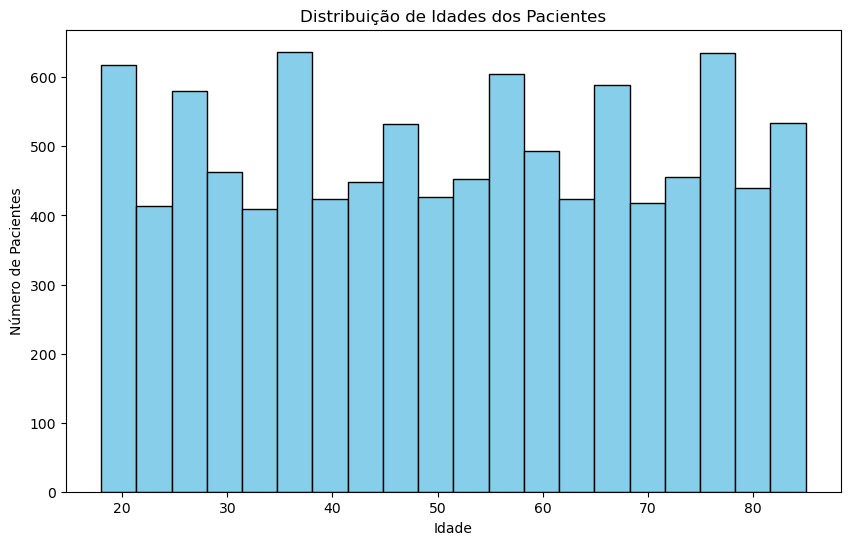

In [23]:

plt.figure(figsize=(10, 6))
plt.hist(df['Idade'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idades dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.show()

>### Insights: Identifique padrões, como a maioria dos pacientes está em faixas etárias específicas. Isso pode influenciar estratégias de marketing ou serviços específicos para determinado grupo


>### Solução de Negócio: Adapte serviços ou campanhas de marketing com base em faixas etárias predominantes. Por exemplo,

>### Esta visualização ajudará a entender a distribuição das idades dos pacientes. Se houver um pico em uma faixa etária específica

## 5.2: Box Plot de Idades por Gênero

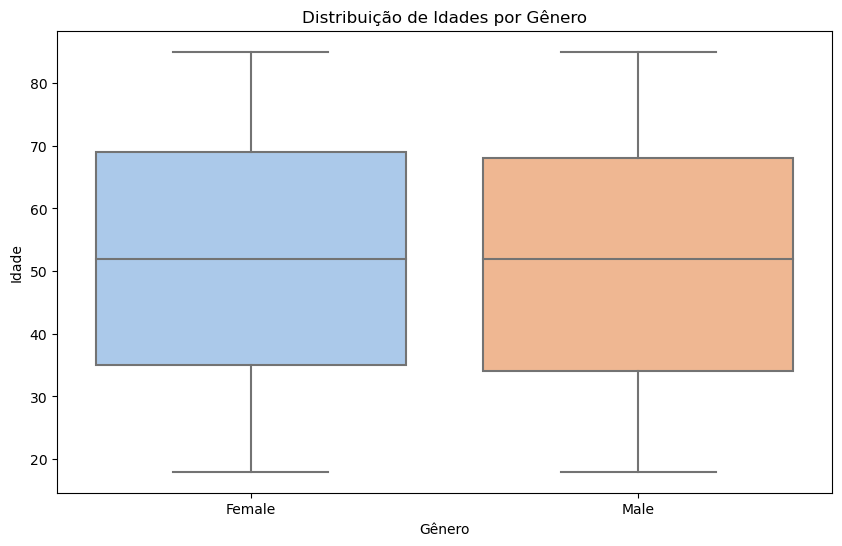

In [24]:
import seaborn as sns

# Criar box plot de idades por gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genero', y='Idade', data=df, palette='pastel')
plt.title('Distribuição de Idades por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.show()


> ###  Este box plot permite comparar a distribuição de idades entre homens e mulheres. Variações significativas podem indicar diferentes necessidades de cuidados de saúde com base no gênero.

## 5.3 Visualização  Box Plot de Valor de Cobrança por Tipo de Admissão

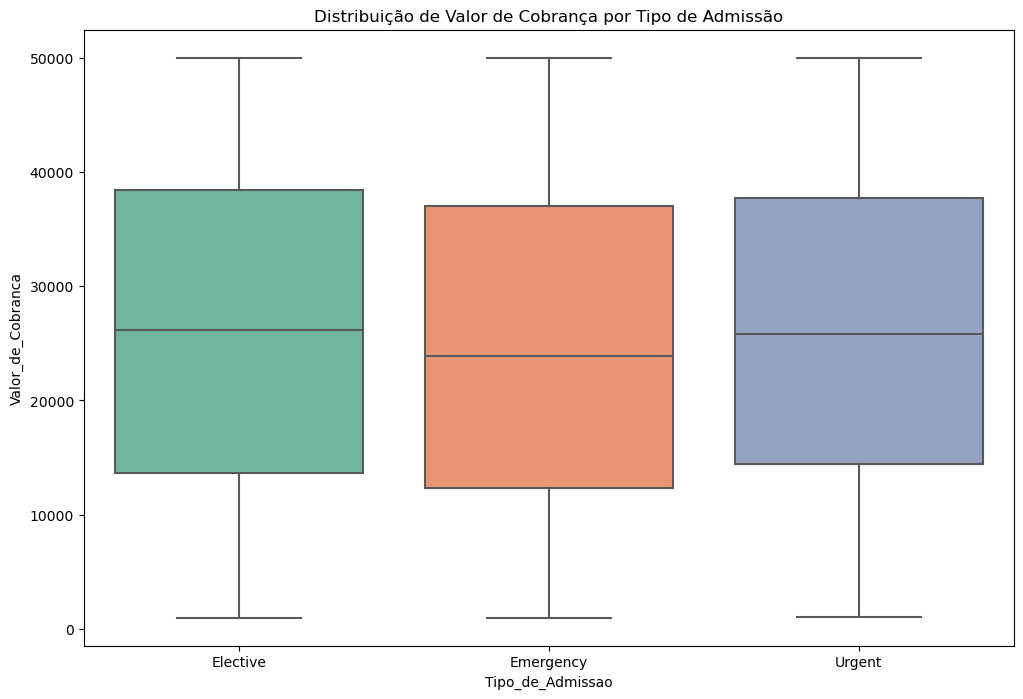

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Tipo_de_Admissao', y='Valor_de_Cobranca', data=df, palette='Set2')
plt.title('Distribuição de Valor de Cobrança por Tipo de Admissão')
plt.xlabel('Tipo_de_Admissao')
plt.ylabel('Valor_de_Cobranca')
plt.show()


>### Análise:  Box plot para comparar a distribuição do valor de cobrança entre diferentes modalidades de admissão.
>### Insights: Identifica se há diferenças importantes nos custos associados a tipos específicos de entrega. Pode revelar oportunidades de otimização de custos ou estratégias de precificação.
>### Solução de Negócio: Desenvolva estratégias de precificação ou políticas de desconto específicas para diferentes tipos de entrega.

## Análise de Valor de Cobrança

## 5.3 Visualização  : Gráfico de Barras da Média de Valor de Cobrança por Condição Médica

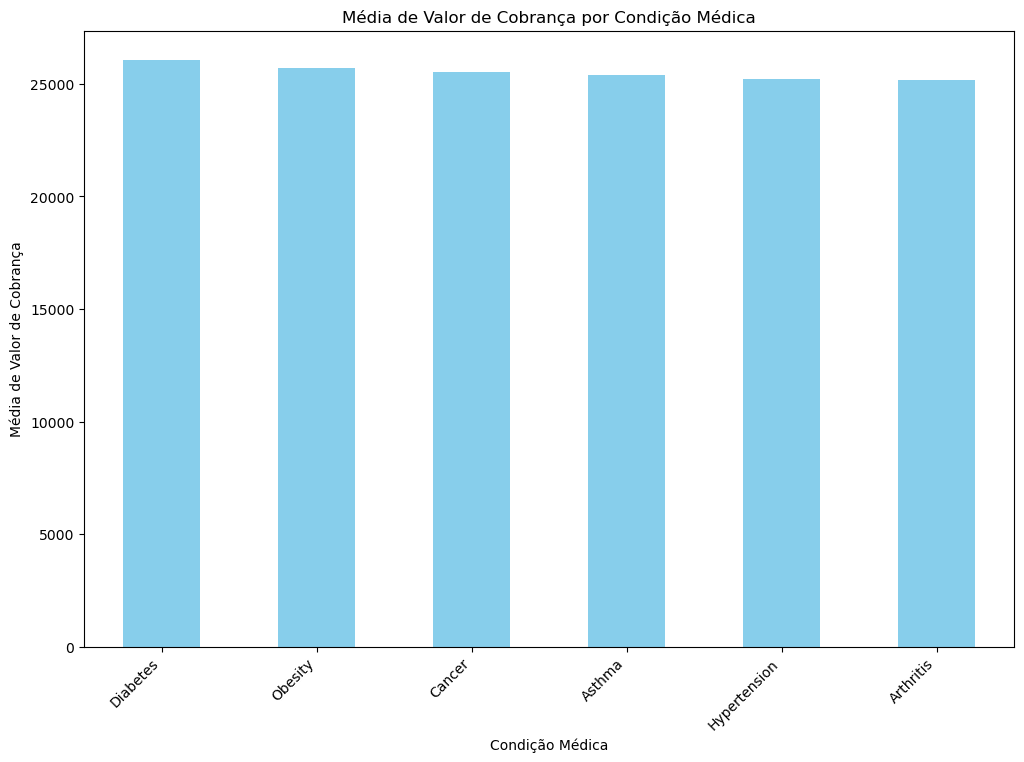

In [26]:


# Calcular a média do valor de cobrança por condição médica
media_por_condicao = df.groupby('Condicao_Medica')['Valor_de_Cobranca'].mean().sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(12, 8))
media_por_condicao.plot(kind='bar', color='skyblue')
plt.title('Média de Valor de Cobrança por Condição Médica')
plt.xlabel('Condição Médica')
plt.ylabel('Média de Valor de Cobrança')
plt.xticks(rotation=45, ha='right')
plt.show()


Text(0, 0.5, 'Densidade')

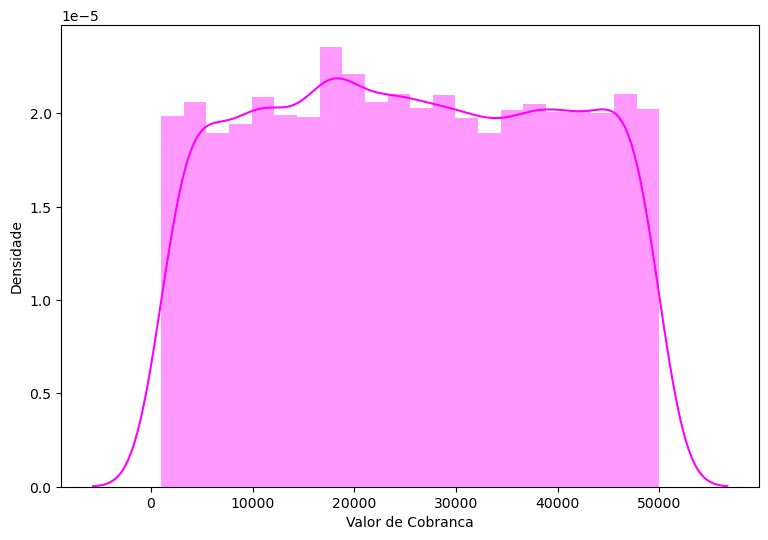

In [27]:
dados=df[df['Valor_de_Cobranca'] < 200000]
plt.figure(figsize=(9,6))
sns.distplot(dados['Valor_de_Cobranca'],color='magenta')
plt.xlabel('Valor de Cobranca') 
plt.ylabel('Densidade')         

 > ### Análise: Gráfico de barras para visualizar a média do valor de cobrança para diferentes condições médicas.
 
 
 > ### Insights: Identifica quais condições médicas estão associadas aos custos médios mais altos. Isso pode orientar a     locação de recursos ou serviços especializados.
 
 
 > ### Solução de Negócio: Adaptar recursos e serviços com base nas condições médicas mais custosas, garantindo eficiência e qualidade.

## Análise de Medicação e Resultados de Teste

 ## 5.4  Visualização : Gráfico de barras Contagem de Prescrições de Medicamentos

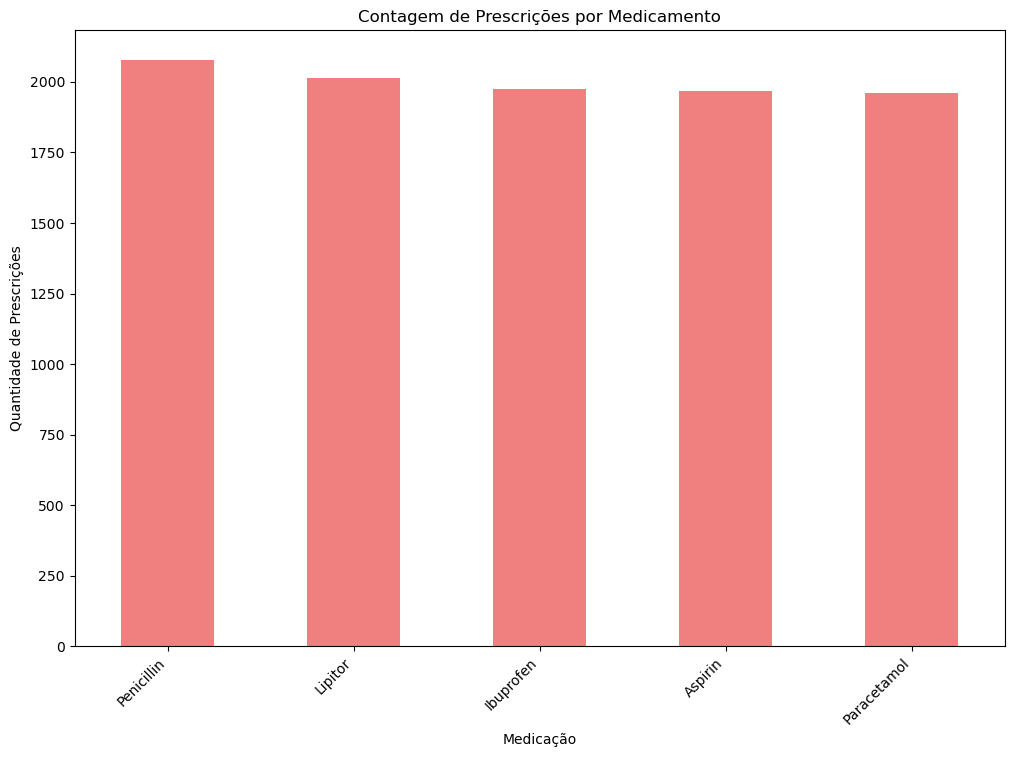

In [28]:
# Contar a quantidade de prescrições por medicamento
contagem_por_medicamento = df['Medicacao'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(12, 8))
contagem_por_medicamento.plot(kind='bar', color='lightcoral')
plt.title('Contagem de Prescrições por Medicamento')
plt.xlabel('Medicação')
plt.ylabel('Quantidade de Prescrições')
plt.xticks(rotation=45, ha='right')
plt.show()


> ### Análise: Gráfico de barras para contar a quantidade de prescrições de medicamentos.
> ### Insights: Identifique quais medicamentos são mais frequentemente prescritos. Podemos sugerir demanda ou importância clínica de determinados tratamentos.


> ### Solução de Negócio: Garantir estoques adequados e planejar recursos para os medicamentos mais prescritos.

## Gráfico de Pizza para Resultados de Teste

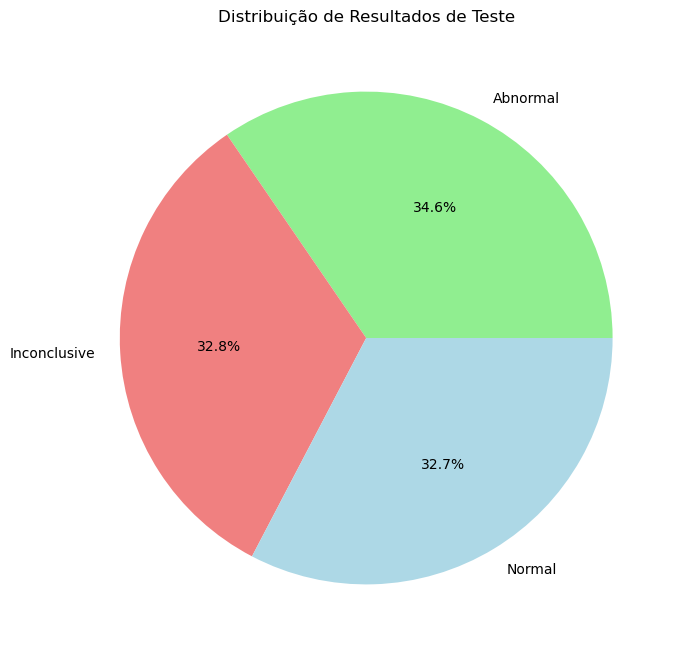

In [29]:
# Contar a distribuição de resultados de teste
contagem_resultados_teste = df['Resultados_do_Teste'].value_counts()

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_resultados_teste, labels=contagem_resultados_teste.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Distribuição de Resultados de Teste')
plt.show()


> ### Análise: O gráfico de pizza para mostrar a distribuição dos resultados de testes (Normal, Anormal, Inconclusivo).
> ### Insights: Observe a proporção de resultados de teste. Pode indicar eficácia de procedimentos de triagem ou necessidade de investigação mais aprofundada.


> ### Solução de Negócio: Ajuste de protocolos de triagem com base na distribuição de resultados de teste.

 ## Análise de Gênero e Condições Médicas

## 5.5 Visualização : Gráfico de Barras de Distribuição por Gênero

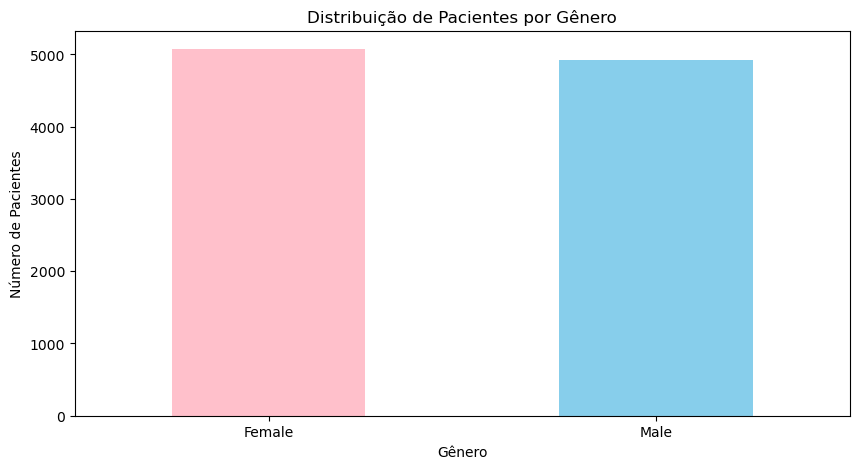

In [30]:
# Criar gráfico de barras de distribuição por gênero
plt.figure(figsize=(10, 5))
df['Genero'].value_counts().plot(kind='bar', color=['pink','skyblue'])
plt.title('Distribuição de Pacientes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=0)
plt.show()


 > ### Análise:Gráfico de barras para detectar as principais condições médicas entre os pacientes.
> ### Percepções: Identifique as condições médicas mais prevalentes na população de pacientes.
> ### Solução de Negócio: Direção de recursos para atender às necessidades específicas das condições médicas mais comuns.

## Gráfico de Barras de Condições Médicas Principais

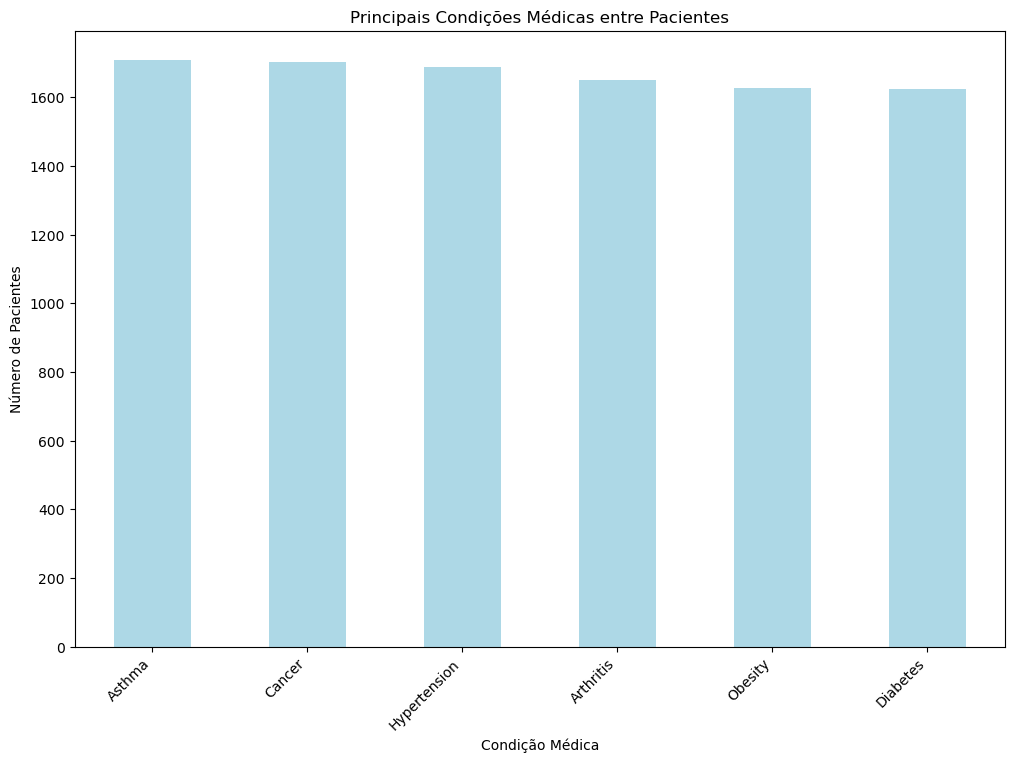

In [31]:
# Criar gráfico de barras das principais condições médicas
plt.figure(figsize=(12, 8))
df['Condicao_Medica'].value_counts().nlargest(10).plot(kind='bar', color='lightblue')
plt.title('Principais Condições Médicas entre Pacientes')
plt.xlabel('Condição Médica')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45, ha='right')
plt.show()


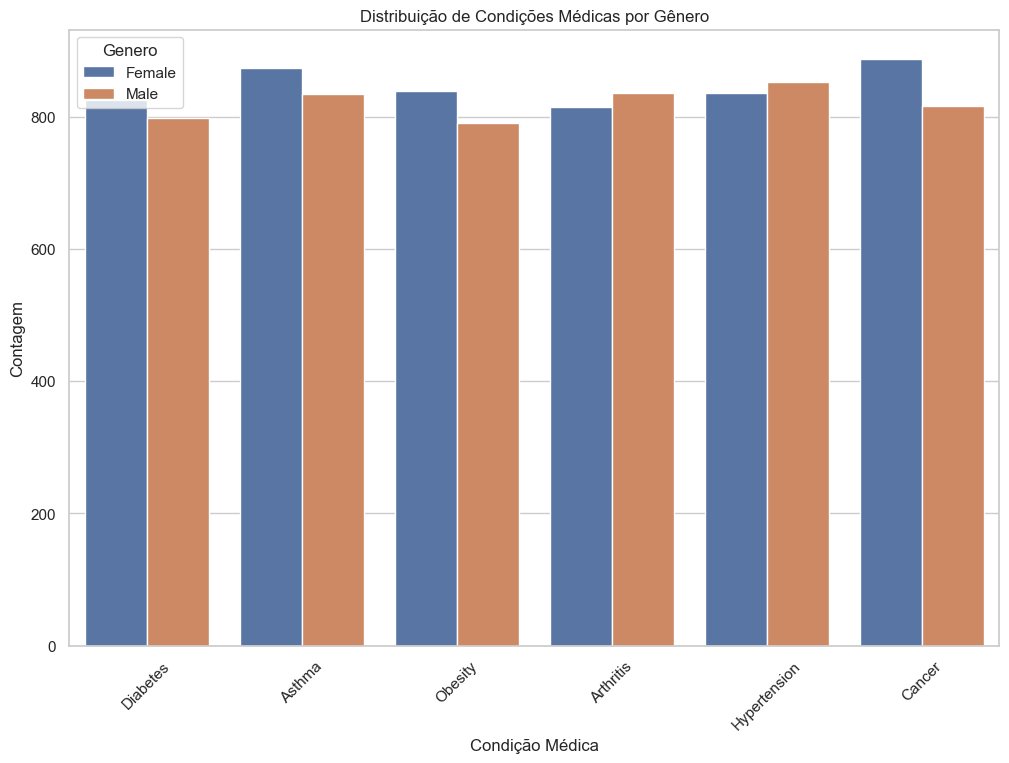

In [77]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.countplot(x='Condicao_Medica', data=df, hue='Genero')
plt.title('Distribuição de Condições Médicas por Gênero')
plt.xlabel('Condição Médica')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


> ### Essas visualizações ajudam a compreender melhor a distribuição de gênero e as condições médicas predominantes em sua população de pacientes.

## Análise Financeira e de Cobrança

### 5.6 Visualização :Boxplot do Valor de Cobrança por Tipo de Admissão

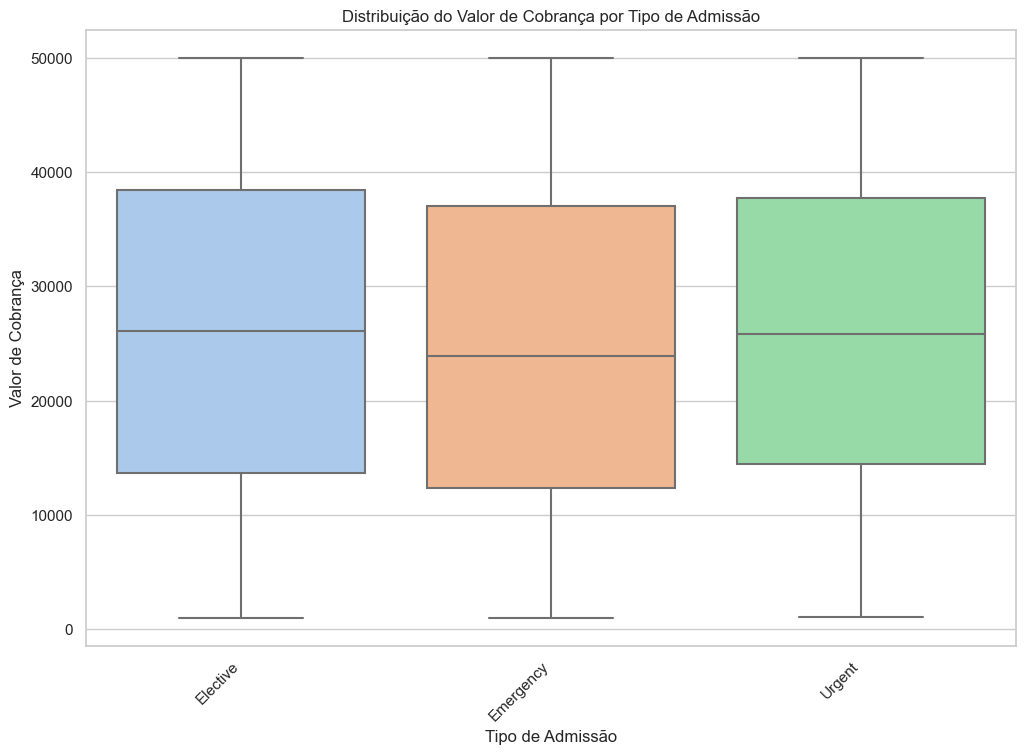

In [76]:
# Criar boxplot do valor de cobrança por tipo de admissão
plt.figure(figsize=(12, 8))
sns.boxplot(x='Tipo_de_Admissao', y='Valor_de_Cobranca', data=df, palette='pastel')
plt.title('Distribuição do Valor de Cobrança por Tipo de Admissão')
plt.xlabel('Tipo de Admissão')
plt.ylabel('Valor de Cobrança')
plt.xticks(rotation=45, ha='right')
plt.show()


> #### Count Plot de Tipo de Admissão

<AxesSubplot:xlabel='Tipo_de_Admissao', ylabel='count'>

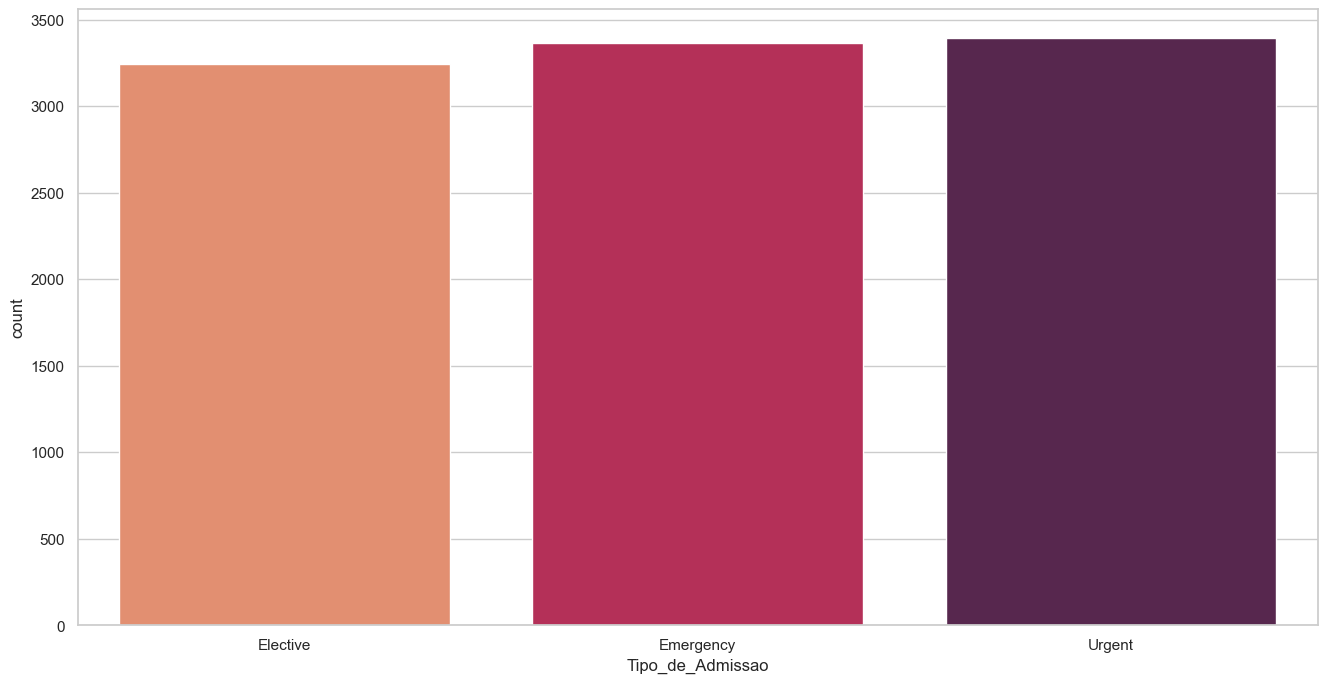

In [75]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['Tipo_de_Admissao'],palette='rocket_r')

> ### Análise: Utiliza um boxplot e count Plot para visualizar a distribuição do valor cobrado com base no tipo de admissão.
> ### Insights: Identifique padrões nos custos associados a diferentes tipos de recebimento.

> ### Solução de Negócio: Ajuste das estratégias de precificação ou aloque recursos financeiros de acordo com as características de cada tipo de admissão.

## Gráfico de Barras de Provedores de Seguros mais Comuns

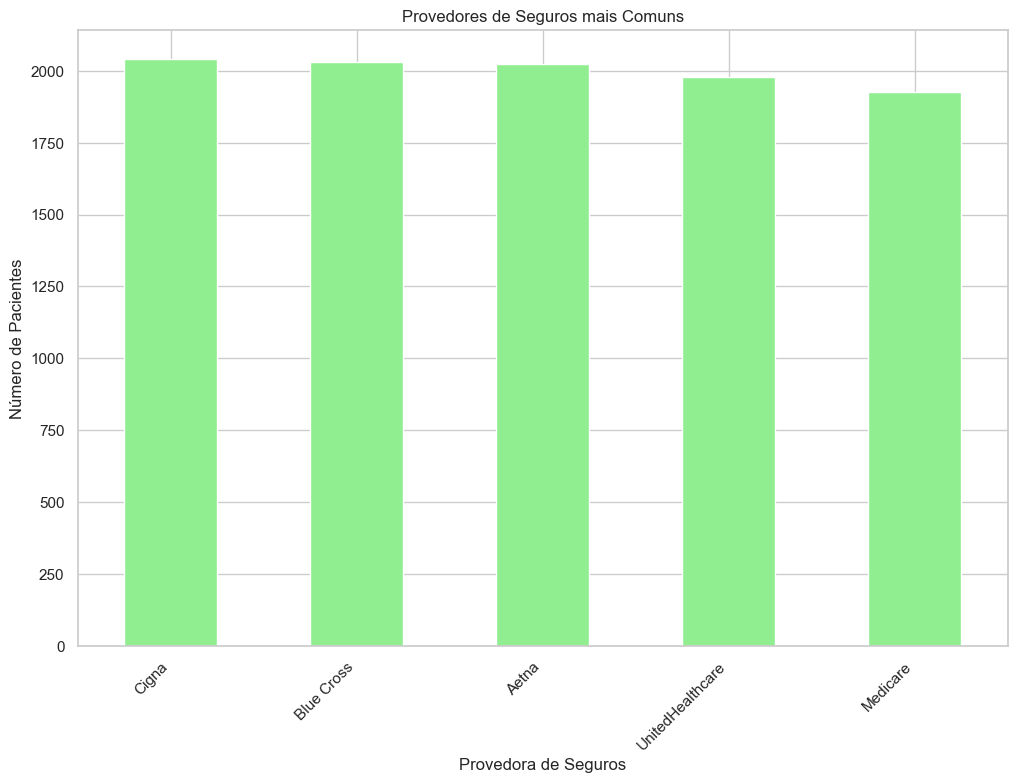

In [74]:
# Criar gráfico de barras dos provedores de seguros mais comuns
plt.figure(figsize=(12, 8))
df['Provedora_de_Seguros'].value_counts().nlargest(10).plot(kind='bar', color='lightgreen')
plt.title('Provedores de Seguros mais Comuns')
plt.xlabel('Provedora de Seguros')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45, ha='right')
plt.show()


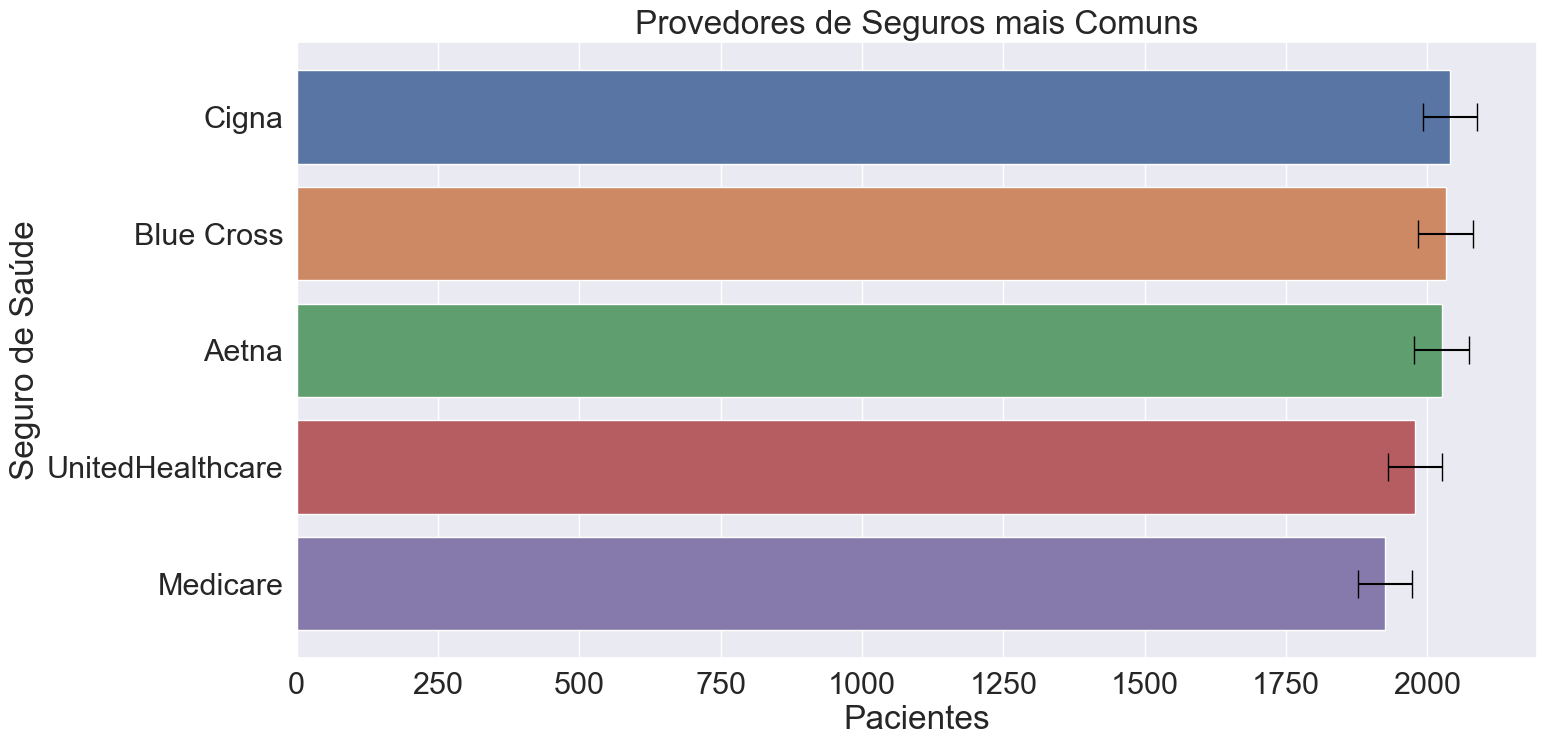

In [36]:
sns.set(font_scale=2)
plt.figure(figsize=(16, 8))

# Contagem de pacientes
count_data = df['Provedora_de_Seguros'].value_counts().nlargest(10)

# Barras de erro (usando o desvio padrão como exemplo)
std_data = df.groupby('Provedora_de_Seguros').size().nlargest(10).std()

# Gráfico de barras
sns.barplot(x=count_data, y=count_data.index)

# Adicionando barras de erro
plt.errorbar(x=count_data, y=count_data.index, xerr=std_data, fmt='none', color='black', capsize=10, label='Capsize')

plt.title("Provedores de Seguros mais Comuns")
plt.xlabel('Pacientes')
plt.ylabel("Seguro de Saúde")
plt.show()



> ### Análise: O gráfico de barras para identificar os provedores de seguros mais comuns.
> ### Insights: Saiba quais seguros têm maior representação na sua população de pacientes.
> ### Solução de Negócio: Fortaleça parcerias com provedores de seguros predominantes e ajuste estratégias de faturamento.

 > # O projeto analítico na área de saúde envolve a limpeza e análise de dados hospitalares, revelando insights demográficos, financeiros e médicos. Destacaram-se padrões temporais e oportunidades de otimização na gestão hospitalar. Uma análise abrangente orienta estratégias para eficiência operacional e melhorias na qualidade do atendimento.

## salvando os dados

In [ ]:
df.shape

In [ ]:
df_clean = df

In [ ]:
# # Caminho do arquivo CSV
 caminho_arquivo_csv = 'C:/Users/ROBERTO/df_clean.csv'

# # Salvar o DataFrame como CSV
df.to_csv(caminho_arquivo_csv, index=False, encoding='utf-8')

print(f'DataFrame salvo como CSV em: {caminho_arquivo_csv}')

 ## Carregando no SqlServer

In [ ]:
import pyodbc
## criar a conexão com o sql server passando os parametros(servidor,usuario,senha,Database)

# Substitua as informações abaixo pelos seus dados de conexão
server = 'DESKTOP-MGR8475'
database = 'Healthcare'
username = 'sa'
password = '101083'
# 
# Cria a string de conexão
conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Tenta estabelecer a conexão
try:
    conn = pyodbc.connect(conn_str)
    print("Conexão bem-sucedida!")
except Exception as e:
    print(f"Erro na conexão: {e}")


In [ ]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'tb_healthcare'")
if cursor.fetchone():
    print("A tabela tb_healthcare existe.")
else:
    print("A tabela tb_healthcare não existe.")


In [ ]:
cursor.execute("SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'tb_healthcare'")
print(cursor.fetchone())


In [ ]:
 cursor.execute("SELECT * FROM dbo.tb_healthcare")  # Substitua 'esquema' pelo esquema real


In [ ]:
cursor.execute("USE Healthcare")


In [ ]:
conn = pyodbc.connect(conn_str)


In [ ]:
# conn = pyodbc.connect(conn_str, timeout=60)


In [ ]:
# Criar uma conexão
conexao = pyodbc.connect(conn_str)

# Criar um cursor
cursor = conexao.cursor()

# Iniciar o tempo
inicio = time.time()

# Loop através do DataFrame e executar os inserts
for index, row in df.iterrows():
    # Criar a consulta SQL com marcadores de posição para os valores
    sql = "INSERT INTO tb_healthcare (Nome, Idade, Genero, Tipo_Sanguineo, Condicao_Medica, Medico, Hospital, Provedora_de_Seguros, Valor_de_Cobranca, Numero_do_Quarto, Tipo_de_Admissao, Medicacao, Resultados_do_Teste, Data_Admissao, Data_de_Alta) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"

    # Ajustar a ordem dos valores para coincidir com a ordem das colunas na tabela
    values = (
        row['Nome'], row['Idade'], row['Genero'], row['Tipo_Sanguineo'],
        row['Condicao_Medica'], row['Medico'], row['Hospital'], row['Provedora_de_Seguros'],
        row['Valor_de_Cobranca'], row['Numero_do_Quarto'], row['Tipo_de_Admissao'],
        row['Medicacao'], row['Resultados_do_Teste'],
        row['Data_Admissao'], row['Data_de_Alta']
    )

    # Executar a consulta SQL
    cursor.execute(sql, values)
    # Commit a transação para salvar as alterações
    conexao.commit()

# Finalizar o tempo
final = time.time()

# Fechar a conexão
conexao.close()

print("Dados inseridos com sucesso no SQL Server")
print('Tempo de Processamento:', int(final - inicio), 'segundos')



# FIM